In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [3]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [5]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [6]:
x.shape, y.shape

((387, 5), (387, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [9]:
binary = LinearRegression()

In [10]:
binary.fit(x[[1]], y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


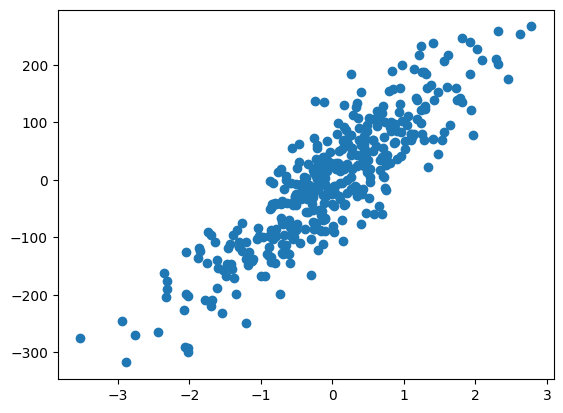

In [11]:
plt.scatter(x[1], y)


In [12]:
binary.predict(x[[1]])


array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

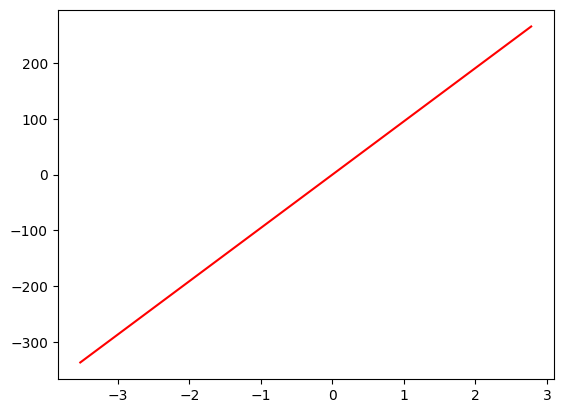

In [14]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [17]:
binary.score(x[[1]], y)


0.7699743283650629

In [18]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

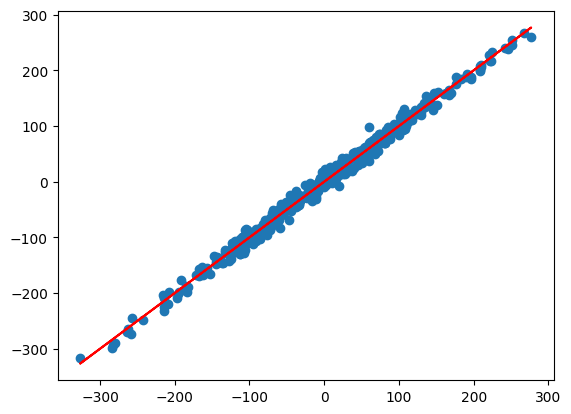

In [19]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### 1 Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.


In [22]:
binary0 = LinearRegression()
binary0.fit(x[[0]], y)


binary1 = LinearRegression()
binary1.fit(x[[1]], y)

binary2 = LinearRegression()
binary2.fit(x[[2]], y)

binary3 = LinearRegression() 
binary3.fit(x[[3]], y)

binary4 = LinearRegression()
binary4.fit(x[[4]], y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
binary0.coef_, binary0.intercept_

(array([[22.78111342]]), array([-4.05666473]))

In [25]:
binary1.coef_, binary1.intercept_

(array([[95.52010745]]), array([0.00332092]))

In [26]:
binary2.coef_, binary2.intercept_

(array([[46.94897635]]), array([2.19340108]))

In [27]:
binary3.coef_, binary3.intercept_

(array([[23.99882407]]), array([-3.48824962]))

In [28]:
binary4.coef_, binary4.intercept_

(array([[1.49082042]]), array([-2.32970907]))

In [31]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))


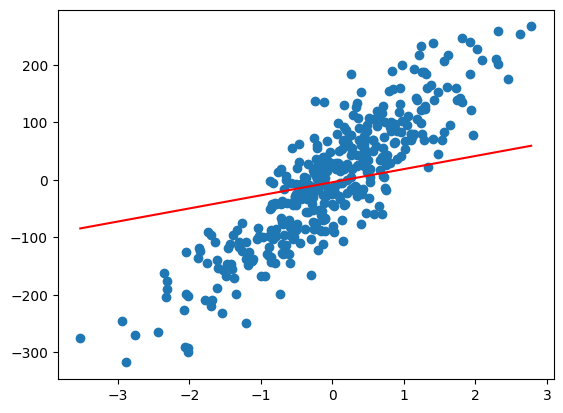

In [32]:
plt.scatter(x[1], y)
plt.plot(xx, binary0.predict(xx), c='r')

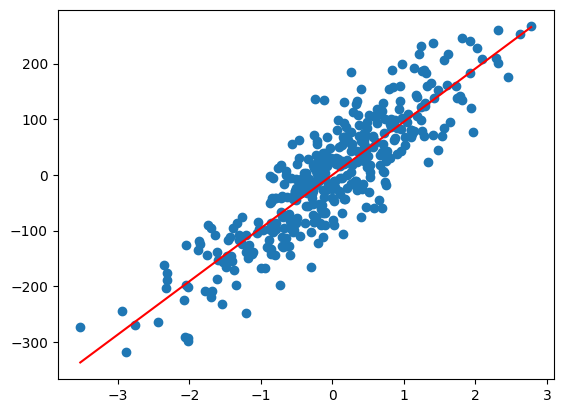

In [33]:
plt.scatter(x[1], y)
plt.plot(xx, binary1.predict(xx), c='r')

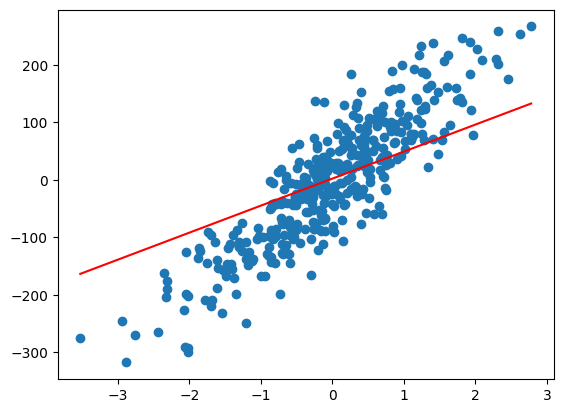

In [34]:
plt.scatter(x[1], y)
plt.plot(xx, binary2.predict(xx), c='r')

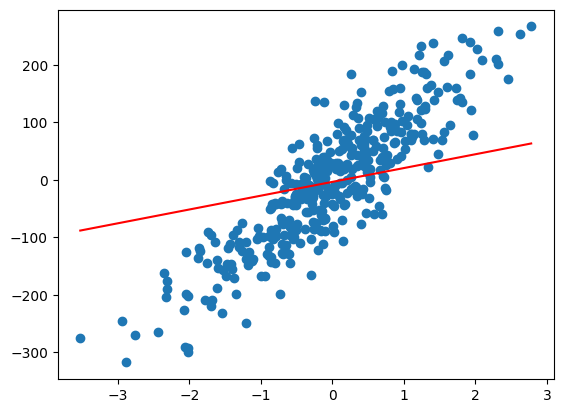

In [35]:
plt.scatter(x[1], y)
plt.plot(xx, binary3.predict(xx), c='r')

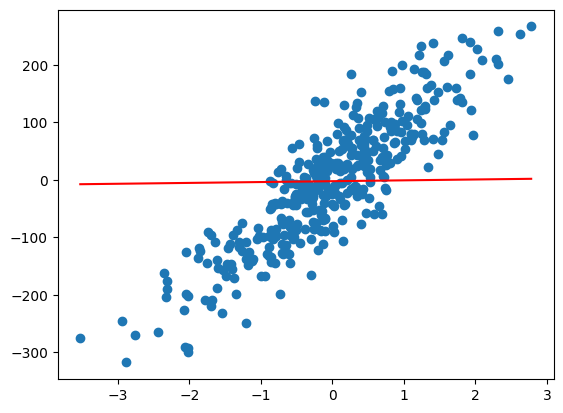

In [36]:
plt.scatter(x[1], y)
plt.plot(xx, binary4.predict(xx), c='r')

### 2 (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [ ]:
class MultipleLinearRegression(object):
    def __init__(self):
        self.weights = None
        self.last_fit_steps = []
        self.last_fit_errors = []
        self.x_min = None
        self.x_max = None
        self.n_features = None

    def _prepare(self, arr):
        arr = np.asarray(arr)
        if arr.ndim == 1:
            arr = arr.reshape(-1, 1)
        return arr

    def _add_bias_column(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

    def normalize(self, X):
        X = self._prepare(X)
        return (X - self.x_min) / (self.x_max - self.x_min)

    def predict(self, X):
        X = self._prepare(X)
        if self.x_min is not None and self.x_max is not None:
            X = self.normalize(X)
        
        X_with_bias = self._add_bias_column(X)
        
        return np.dot(X_with_bias, self.weights)

    def error(self, X, Y):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        predictions = self.predict(X)
        return np.sum((predictions - Y) ** 2) / (2 * len(X))
    
    def show_last_fit_graph(self):
        plt.figure()
        plt.plot(self.last_fit_steps, self.last_fit_errors, 'g')
        plt.xlabel('Step')
        plt.ylabel('Error')
        plt.title('Gradient Descent Error (Multiple Regression)')
        plt.show()

    def show_model(self, X, Y):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        predictions = self.predict(X)
        
        plt.figure()
        plt.scatter(predictions, Y, alpha=0.6, label='Actual vs Predicted')
        plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Prediction')
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Multiple Linear Regression: Actual vs Predicted')
        plt.legend()
        plt.show()
        
        # R^2 score
        ss_res = np.sum((Y - predictions) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        print(f"R² Score: {r2:.4f}")

    def fit(self, X, Y, alpha=0.01, accuracy=0.01, max_steps=5000):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        
        self.n_features = X.shape[1]
        self.weights = np.zeros(self.n_features + 1)
        
        self.x_min = np.min(X, axis=0)
        self.x_max = np.max(X, axis=0)
        X_norm = self.normalize(X)
        
        X_with_bias = self._add_bias_column(X_norm)
        
        self.last_fit_errors, self.last_fit_steps = [], []
        m = len(X)
        
        step = 0
        while step < max_steps:
            predictions = np.dot(X_with_bias, self.weights)
            error = predictions - Y
            dw = np.dot(X_with_bias.T, error) / m

            self.weights -= alpha * dw
            
            new_err = np.sum(error ** 2) / (2 * m)
            
            step += 1
            self.last_fit_steps.append(step)
            self.last_fit_errors.append(new_err)
            
            if new_err < accuracy:
                print(f'Accuracy reached at step {step}. Final error: {new_err:.6f}')
                break
                
            if step > 1 and self.last_fit_errors[-1] > self.last_fit_errors[-2]:
                alpha /= 2
                print(f'Error increased at step {step}. New alpha: {alpha:.6f}')
                
        else: 
            print(f'Max steps ({max_steps}) reached. Final error: {new_err:.6f}')
            
        return self.last_fit_steps, self.last_fit_errors

    def get_coefficients(self):
        """Возвращает коэффициенты модели"""
        return {
            'bias': self.weights[0],           
            'weights': self.weights[1:],     
            'features': self.n_features
        }

In [47]:
model = MultipleLinearRegression()

In [48]:
model.fit(x, y, alpha=0.1, accuracy=0.01, max_steps=5000)

Max steps (5000) reached. Final error: 46.767677


([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

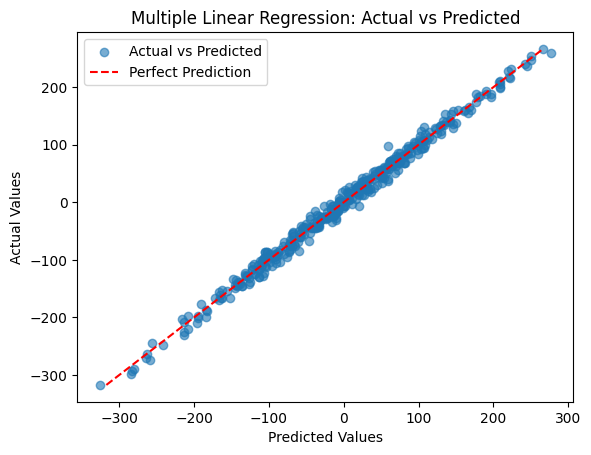

R² Score: 0.9922


In [49]:
model.show_model(x, y)

In [50]:
model.get_coefficients()

{'bias': np.float64(-587.2136466534193),
 'weights': array([ 91.29573331, 587.14982167, 219.51246063, 199.13459714,
         -1.90061776]),
 'features': 5}

In [51]:
from sklearn.preprocessing import PolynomialFeatures


In [52]:
poly = PolynomialFeatures(degree=2, include_bias=False)


,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
